In [1]:
#import the standrad libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/kaggle/input/top-100-popular-movies-from-2003-to-2022-imdb/movies.csv')
data.head()

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,"$350,000,000","$2,267,946,983",United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,"$35,000,000","$108,967","United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,"$85,900,000","$239,268,602","Japan, United States"
3,The Banshees of Inisherin,7.8,2022,November,R,114,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,Unknown,"$19,720,823","Ireland, United Kingdom, United States"
4,M3gan,6.4,2022,December,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,"$12,000,000","$171,253,910",United States


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              2000 non-null   object 
 1   Rating             1999 non-null   float64
 2   Year               2000 non-null   int64  
 3   Month              2000 non-null   object 
 4   Certificate        1966 non-null   object 
 5   Runtime            2000 non-null   object 
 6   Directors          2000 non-null   object 
 7   Stars              2000 non-null   object 
 8   Genre              2000 non-null   object 
 9   Filming_location   2000 non-null   object 
 10  Budget             2000 non-null   object 
 11  Income             2000 non-null   object 
 12  Country_of_origin  2000 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 203.2+ KB


In [4]:
data.describe()

,Rating,Year
count,1999.000000,2000.000000
mean,6.666583,2012.500000
std,0.911704,5.767723
min,1.900000,2003.000000
25%,6.150000,2007.750000
50%,6.700000,2012.500000
75%,7.300000,2017.250000
max,9.600000,2022.000000


In [5]:
#Checking the null values in the dataset
data.isna().sum()/len(data)

Title                0.0000
Rating               0.0005
Year                 0.0000
Month                0.0000
Certificate          0.0170
Runtime              0.0000
Directors            0.0000
Stars                0.0000
Genre                0.0000
Filming_location     0.0000
Budget               0.0000
Income               0.0000
Country_of_origin    0.0000
dtype: float64

In [6]:
#fill the null values in the dataset
data['Rating']=data['Rating'].fillna(method='ffill')
data['Certificate']=data['Certificate'].fillna(0)

# Explore Data Analysis

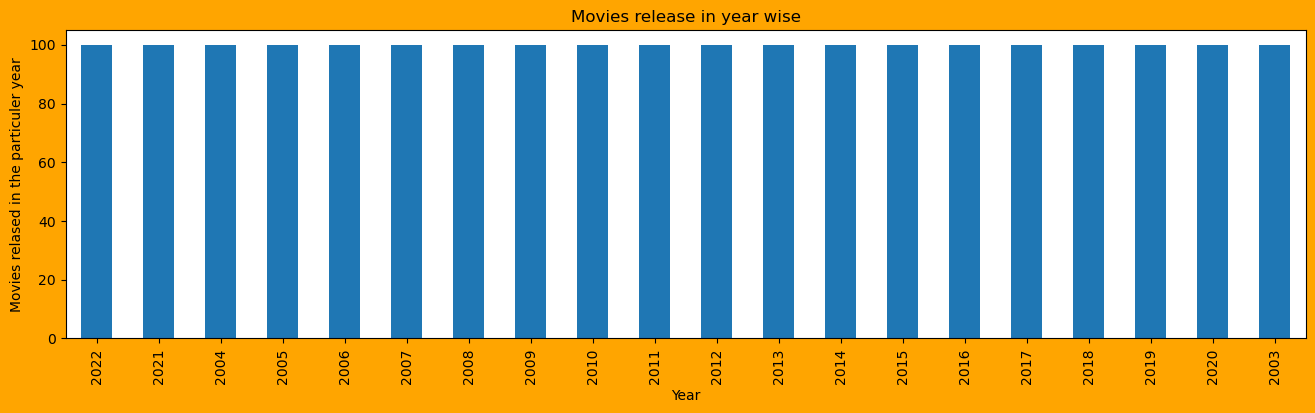

In [7]:
#Let's visualize the movies released in year wise
plt.rcParams['figure.facecolor']='orange'
data['Year'].value_counts().plot(kind='bar',figsize=(16,4),title='Movies release in year wise')
plt.xlabel('Year')
plt.ylabel('Movies relased in the particuler year')
plt.show()

In [8]:
#James Cameron movies in the dataset
james_cameron=data[data['Directors']=='James Cameron']
james_cameron

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,"$350,000,000","$2,267,946,983",United States
1300,Avatar,7.8,2009,December,PG-13,162,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",USA,"$237,000,000","$2,922,917,914",United States


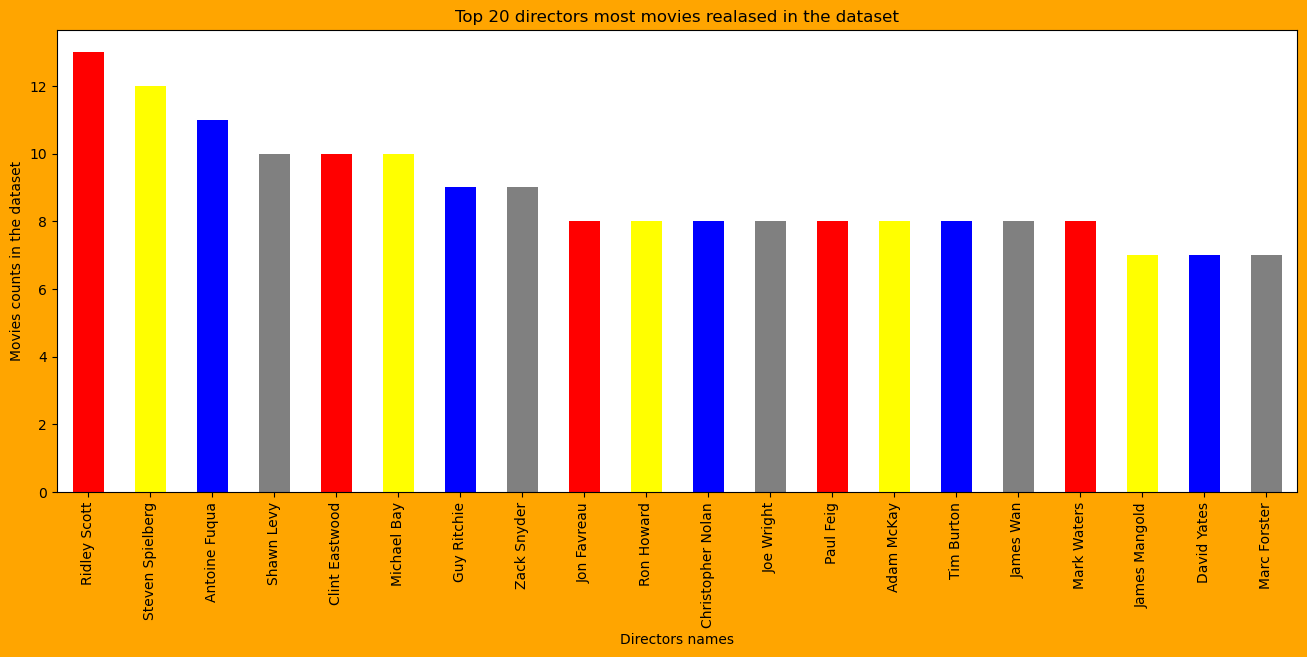

In [9]:
#Let's visualize the top 20 dirctors most realased movies in the dataset
data['Directors'].value_counts(normalize=False)[:20].plot(kind='bar',color=['red','yellow','blue','gray'],title='Top 20 directors most movies realased in the dataset',figsize=(16,6))
plt.xlabel('Directors names')
plt.ylabel('Movies counts in the dataset')
plt.show()

In [10]:
#Let's convert the rating into 5 rating which easliy understand the rating as 5 
data=data.assign(Rating=data['Rating']/2)
data.head(2)

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,3.9,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,"$350,000,000","$2,267,946,983",United States
1,Guillermo del Toro's Pinocchio,3.8,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,"$35,000,000","$108,967","United States, Mexico, France"


Text(0, 0.5, "Count's of the rating")

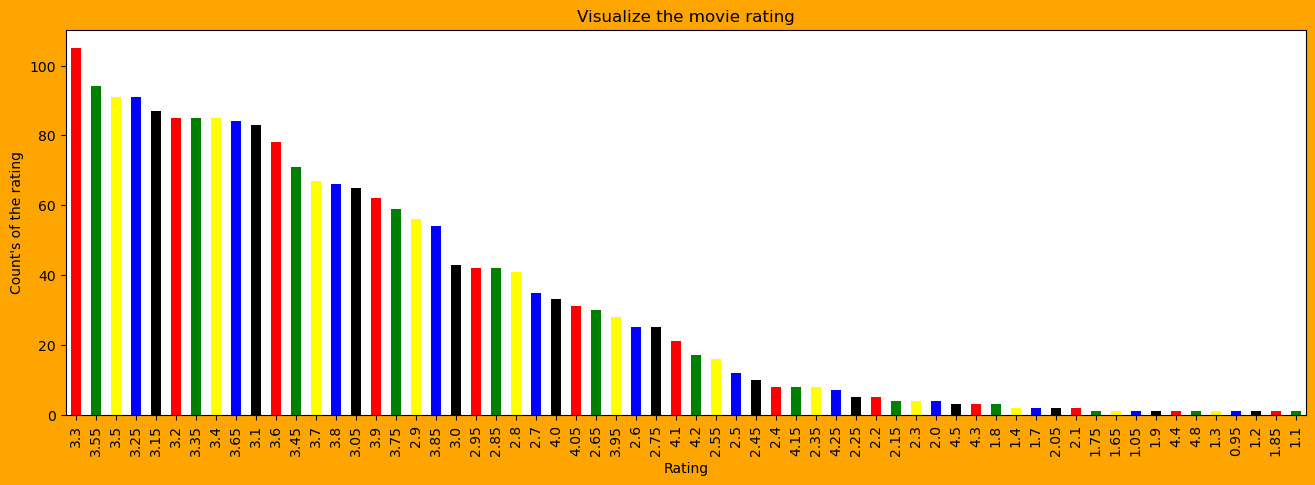

In [11]:
#Let's visualize the rating value using the barchart

data['Rating'].value_counts(ascending=False).plot(kind='bar',title='Visualize the movie rating',figsize=(16,5),color=['red','green','yellow','blue','black'])
plt.xlabel("Rating")
plt.ylabel("Count's of the rating")


In [12]:
# data['Income']= [int(str(i).replace(",", "")) for i in data['Income']]
data['Income'] = data['Income'].str.replace(',', '').str.strip()
data['Income'] = data['Income'].str.replace('$', '').str.strip()
data['Income'] = pd.to_numeric(data['Income'], errors='coerce')

In [13]:
data['Budget'] = data['Budget'].str.replace(',', '').str.strip()
data['Budget'] = data['Budget'].str.replace('$', '').str.strip()
data['Budget'] = pd.to_numeric(data['Budget'], errors='coerce')

In [14]:
#Let's find the profit of the each movies with percentage
data=data.assign(profit=data['Income']-data['Budget']*0.10)
data.head()

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin,profit
0,Avatar: The Way of Water,3.90,2022,December,PG-13,192,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350000000.0,2.267947e+09,United States,2.232947e+09
1,Guillermo del Toro's Pinocchio,3.80,2022,December,PG,117,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,35000000.0,1.089670e+05,"United States, Mexico, France",-3.391033e+06
2,Bullet Train,3.65,2022,August,R,127,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,85900000.0,2.392686e+08,"Japan, United States",2.306786e+08
3,The Banshees of Inisherin,3.90,2022,November,R,114,Martin McDonagh,"Colin Farrell, Brendan Gleeson, Kerry Condon, ...","Comedy, Drama",Ireland,NaN,1.972082e+07,"Ireland, United Kingdom, United States",NaN
4,M3gan,3.20,2022,December,PG-13,102,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,12000000.0,1.712539e+08,United States,1.700539e+08


In [15]:
year_month=data.groupby(['Year','Month'])['Directors'].count()
year_month

Year  Month    
2003  April         5
      August        8
      December      8
      February      7
      January       7
                   ..
2022  March         4
      May           1
      November     21
      October      11
      September    10
Name: Directors, Length: 242, dtype: int64

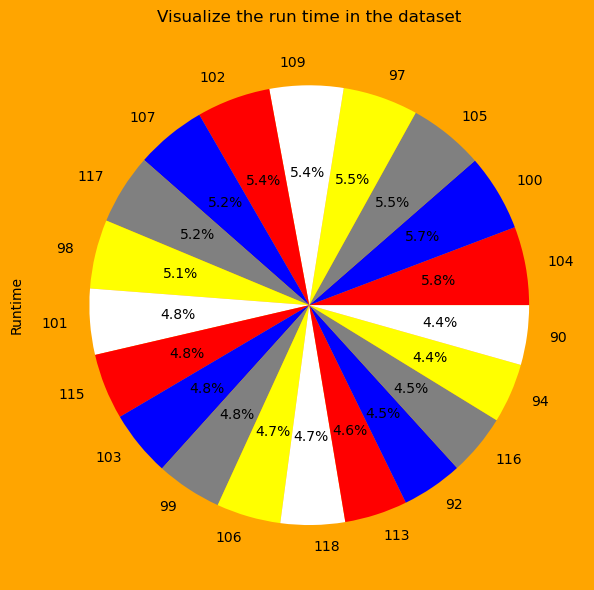

In [16]:
#find the run time 
data['Runtime'].value_counts()[:20].plot(kind='pie',colors=['red','blue','gray','yellow','white'],
    autopct='%1.1f%%',title='Visualize the run time in the dataset',figsize=(16,6))
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count of the Filming_location')

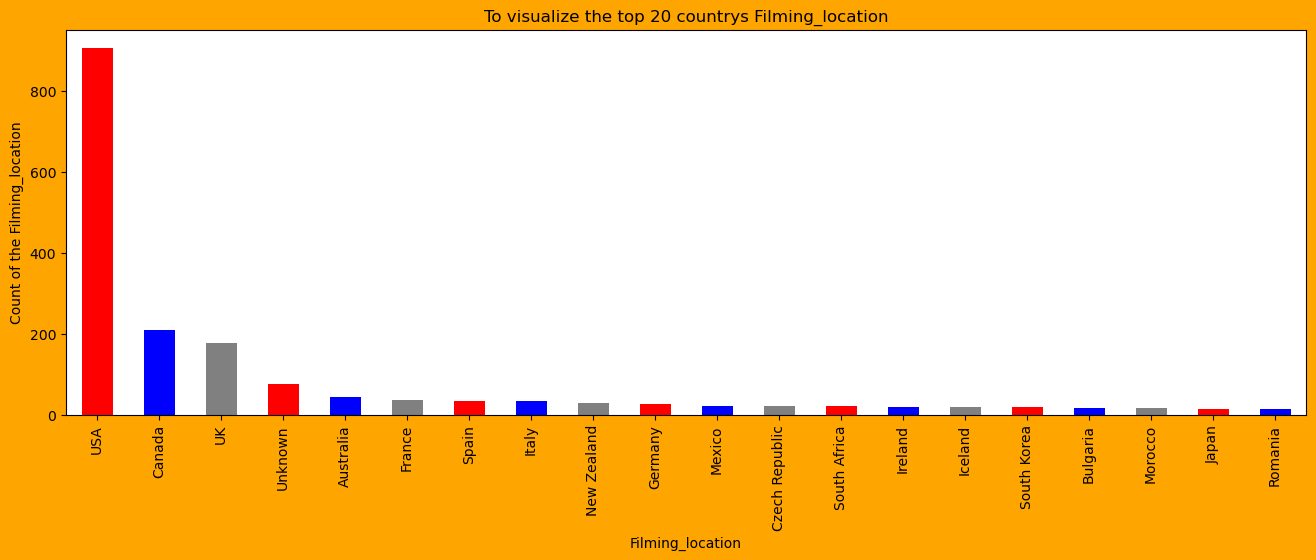

In [17]:
#Filming_location visualize the in the dataset
data['Filming_location'].value_counts(normalize=False)[:20].plot(kind='bar',title='To visualize the top 20 countrys Filming_location',figsize=(16,5),color=['red','blue','gray'])
plt.xlabel('Filming_location')
plt.ylabel('Count of the Filming_location')

In [18]:
rating=pd.pivot_table(data=data,columns='Year',values='Rating',aggfunc='mean')
rating

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Rating,3.2895,3.373,3.2825,3.3565,3.378,3.298,3.3395,3.3455,3.377,3.3375,3.367,3.346,3.344,3.381,3.357,3.3385,3.3455,3.163,3.306,3.3505


In [19]:
#Sorting the values
data.sort_values(by='Rating',ascending=False)

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin,profit
1249,My Little Princess,4.80,2010,September,0,Unknown,Enzo Zelocchi,"Enzo Zelocchi, Charlotte Labadie, David M Edel...","Romance, Drama, Family",Unknown,10.0,NaN,United States,NaN
1193,"67th Street, New York, NY",4.50,2011,January,0,105,Enzo Zelocchi,"Enzo Zelocchi, David Man, Ladae Bond, Casey Cadag","Crime, Thriller",Unknown,300000.0,NaN,United States,NaN
1903,The Lord of the Rings: The Return of the King,4.50,2003,December,PG-13,201,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...","Action, Adventure, Drama",New Zealand,94000000.0,1.146458e+09,"New Zealand, United States",1.137058e+09
1401,The Dark Knight,4.50,2008,July,PG-13,152,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","Action, Crime, Drama",USA,185000000.0,1.006234e+09,"United States, United Kingdom",9.877342e+08
1200,Inception,4.40,2010,July,PG-13,148,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon Levitt, Ellio...","Action, Adventure, Sci-Fi",Canada,160000000.0,8.368481e+08,"United States, United Kingdom",8.208481e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,Dragonball Evolution,1.30,2009,April,PG,85,James Wong,"Justin Chatwin, James Marsters, Chow Yun Fat, ...","Action, Adventure, Fantasy",Mexico,30000000.0,5.572077e+07,"United Kingdom, Mexico, Hong Kong, United States",5.272077e+07
1524,Epic Movie,1.20,2007,January,PG-13,86,"Jason Friedberg, Aaron Seltzer","Kal Penn, Jennifer Coolidge, Fred Willard, Ada...","Adventure, Comedy, Fantasy",USA,20000000.0,8.723816e+07,United States,8.523816e+07
1780,Son of the Mask,1.10,2005,February,PG,94,Lawrence Guterman,"Jamie Kennedy, Traylor Howard, Alan Cumming, L...","Comedy, Family, Fantasy",Australia,84000000.0,5.998155e+07,"United States, Germany",5.158155e+07
848,Mantus,1.05,2014,2014,0,Unknown,Enzo Zelocchi,"Enzo Zelocchi, Miryam Negrin, Paul Gregory, Ma...","Comedy, Drama, Thriller",USA,250000.0,NaN,United States,NaN


In [20]:
#Let's find  the how many comedy 
comedy=data[data['Genre']=='Comedy']
comedy['Genre'].value_counts()

Comedy    57
Name: Genre, dtype: int64

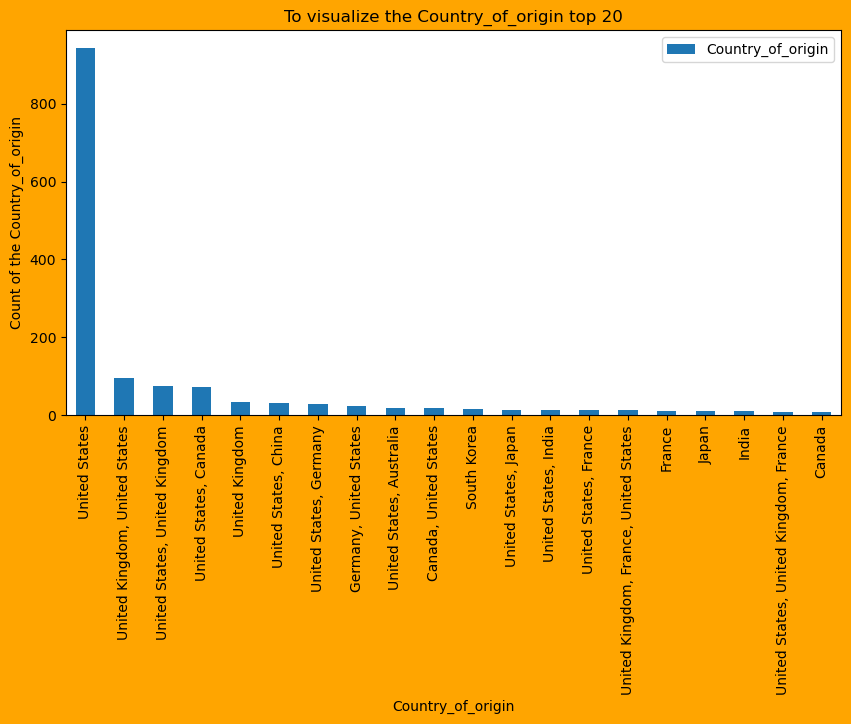

In [21]:
# let's visualize the Country_of_origin in the dataset
data['Country_of_origin'].value_counts()[:20].plot(kind='bar',title='To visualize the Country_of_origin top 20',figsize=(10,5))
plt.xlabel("Country_of_origin")
plt.ylabel("Count of the Country_of_origin")
# plt.tight_layout()
plt.legend()
plt.show()